In [1]:
# Arbitary value imputation means adding either the large value or a small value 

In [2]:
# or combination of -1 or 99 

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df =  pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [7]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [8]:
df['Age_1'] = df['Age'].fillna(-1)

In [9]:
df['Age_999'] = df['Age'].fillna(999)

<AxesSubplot:>

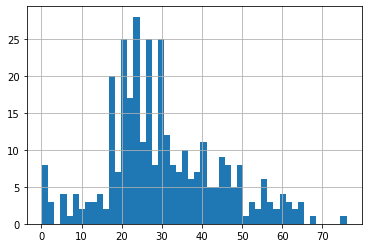

In [10]:
df['Age'].hist(bins = 50)

In [11]:
df['Age'].max()

76.0

In [12]:
df['Age'].min()

0.17

In [13]:
df['Age_max'] = df['Age'].fillna(76.0)

In [14]:
df['Age_min'] = df['Age'].fillna(0.17)

In [15]:
df.head()

,Survived,Age,Fare,Age_1,Age_999,Age_max,Age_min
0,0,34.5,7.8292,34.5,34.5,34.5,34.5
1,1,47.0,7.0000,47.0,47.0,47.0,47.0
2,0,62.0,9.6875,62.0,62.0,62.0,62.0
3,0,27.0,8.6625,27.0,27.0,27.0,27.0
4,1,22.0,12.2875,22.0,22.0,22.0,22.0


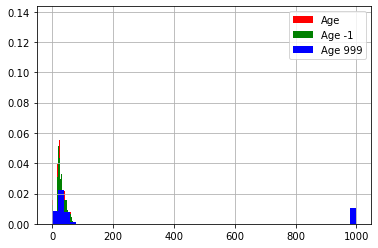

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df['Age'].hist(bins = 50 , density = True , color = 'red' ,  label = 'Age')
df['Age_1'].hist(bins = 50 , density = True , color = 'green' , label = 'Age -1')

df['Age_999'].hist(bins = 50 , density = True , color = 'blue' , ax = ax , label = 'Age 999')
#df['Age_max'].hist(bins = 50 , density = True , color = 'yellow' , ax = ax , label = 'Age max')
#df['Age_min'].hist(bins = 50 , density = True , color = 'black' , ax = ax , label = 'Age min')

plt.legend(loc = 0)

In [35]:
df.columns

Index(['Survived', 'Age', 'Fare', 'Age_1', 'Age_999', 'Age_max', 'Age_min'], dtype='object')

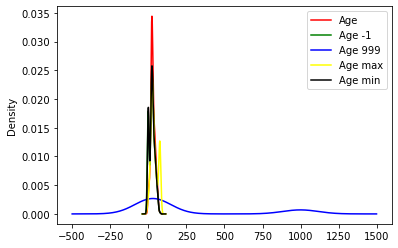

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind = 'kde', color = 'red' , ax = ax, label = 'Age')
df['Age_1'].plot(kind = 'kde', color = 'green' , ax = ax , label = 'Age -1')
df['Age_999'].plot(kind = 'kde' , color = 'blue' , ax = ax , label = 'Age 999')
df['Age_max'].plot(kind = 'kde' , color = 'yellow' , ax = ax , label = 'Age max')
df['Age_min'].plot(kind = 'kde' ,color = 'black' , ax = ax , label = 'Age min')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()

### using sklearn 

In [47]:
df =  pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
ar = SimpleImputer(strategy='constant',fill_value=99)

In [49]:
ar.fit(df)

SimpleImputer(fill_value=99, strategy='constant')

In [50]:
ar.statistics_

array([99., 99., 99.])

In [53]:
df.iloc[: , 1] = ar.fit_transform(df.iloc[: , 1].values.reshape(-1,1))

In [54]:
df.isnull().sum()

Survived    0
Age         0
Fare        1
dtype: int64

### using feature engine 

In [73]:
df =  pd.read_csv("E:\\Feature engineering\\Datasets\\titanic.csv" , usecols = ['Age','Fare','Survived'])

In [74]:
from feature_engine.imputation import ArbitraryNumberImputer

In [75]:
fr = ArbitraryNumberImputer(arbitrary_number=99 , variables=['Age'])

In [ ]:
fr = ArbitraryNumberImputer(arbitrary_number=99 ,imputer_dict={'Age':99 , "Fare":-1})

In [76]:
fr.fit(df)

ArbitraryNumberImputer(arbitrary_number=99, variables=['Age'])

In [77]:
fr.variables_

['Age']

In [78]:
fr.imputer_dict_

{'Age': 99}

In [79]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [80]:
data = fr.transform(df)

In [81]:
data.isnull().sum()

Survived    0
Age         0
Fare        1
dtype: int64